In [2]:
#!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------- -------------------------------- 0.6/3.0 MB 12.2 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 19.2 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 23.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB ? eta

In [3]:
#!pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
     -------- ----------------------------- 20.5/88.8 kB 320.0 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/88.8 kB 326.8 kB/s eta 0:00:01
     ----------------------------------- -- 81.9/88.8 kB 508.4 kB/s eta 0:00:01
     -------------------------------------- 88.8/88.8 kB 456.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20745 sha256=15842b16ae4ccc2826bf45587f83f2fd446fbedf2eedaac3598bcd31fa699874
  Stored in directory: c:\users\cursostardes\ap

[*********************100%%**********************]  1 of 1 completed
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_20820\3037877971.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = Rectangle((date_value - 0.2, min(open_price, close_price)),


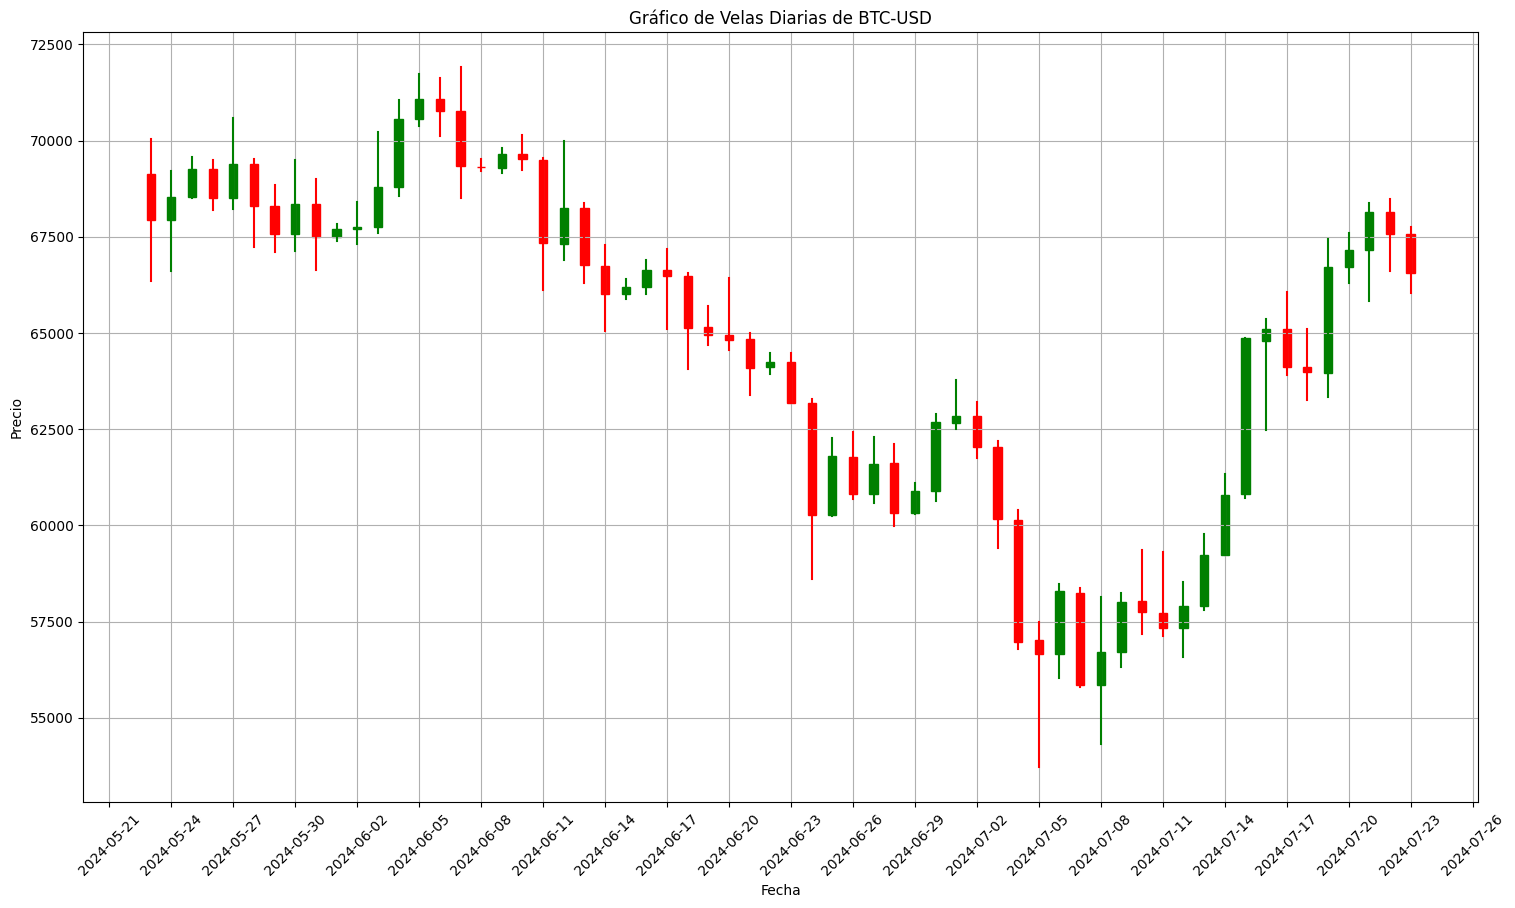

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import yfinance as yf
import pandas as pd
import mplcursors
 
# Descargar datos históricos de BTC de los últimos tres meses
btc_data = yf.download('BTC-USD', period='3mo', interval='1d')
 
# Filtrar los últimos dos meses de datos
btc_data = btc_data.loc[btc_data.index >= (btc_data.index.max() - pd.DateOffset(months=2))]
 
# Convertir el índice a columna para manejar las fechas
btc_data.reset_index(inplace=True)
 
# Renombrar columnas para simplificar el acceso
btc_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
 
# Crear un DataFrame de OHLC diario
ohlc_daily = btc_data[['Date', 'Open', 'High', 'Low', 'Close']]
 
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(18, 10))  # Aumentar el tamaño de la figura
 
# Función para dibujar las velas
def plot_candlestick(ax, df):
    patches = []
    for _, row in df.iterrows():
        open_price = row['Open']
        close_price = row['Close']
        low_price = row['Low']
        high_price = row['High']
        date_value = date2num(row['Date'])  # Convertir la fecha a formato numérico
 
        color = 'green' if close_price >= open_price else 'red'
        # Dibujar la línea vertical
        ax.plot([date_value, date_value], [low_price, high_price], color=color, linewidth=1.5)
        # Dibujar el cuerpo de la vela
        rect = Rectangle((date_value - 0.2, min(open_price, close_price)),
                         0.4, abs(close_price - open_price),
                         color=color, edgecolor='black')
        ax.add_patch(rect)
        patches.append((rect, row['Close']))  # Guardar el rectángulo y el precio de cierre
    return patches
 
# Graficar las velas
patches = plot_candlestick(ax, ohlc_daily)  
 
# Configurar el formato de fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
 
# Rotar etiquetas en el eje x
plt.xticks(rotation=45)
 
# Configurar el título y las etiquetas de los ejes
ax.set_title('Gráfico de Velas Diarias de BTC-USD')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
 
# Mostrar la cuadrícula
ax.grid(True)
 
# Añadir interactividad con mplcursors
cursor = mplcursors.cursor([p[0] for p in patches])
@cursor.connect("add")
def on_add(sel):
    rect, close_price = patches[sel.index]
    sel.annotation.set(text=f'Precio de cierre: {close_price:.2f}')
    sel.annotation.xy = (rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2)
 
# Mostrar el gráfico
plt.show()